In [61]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\arunp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [62]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

In [63]:
data_train = pd.read_csv("drugsComTrain_raw.csv")
data_test=pd.read_csv("drugsComTest_raw.csv")
data=pd.concat([data_train,data_test])


In [64]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [65]:
data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [66]:
def clean(x):
    x = re.sub("wouldn't",'would not',x)
    x = re.sub("they've",'they have',x)
    x = re.sub("should've",'should have',x)
    x = re.sub("could've",'could have',x)
    x = re.sub("can't",'can not',x)
    x = re.sub("couldn't",'could not',x)
    x = re.sub("didn't",'did not',x)
    x = re.sub("do've",'do have',x)
    
    #to remove html tags
    x = re.sub(r'<.*?>', '', x)
    
    #to remove everything except alphabets
    x = re.sub(r'[^a-zA-Z]',' ',x)

    return x.lower() #lowercase

In [67]:
# Drop unnecessary ', 'condition', 'dacolumns
data.drop(['drugName', 'usefulCount'], axis=1, inplace=True)

# Replace ratings with sentiment labels
data['sentiment'] = np.where(data['rating']>=6, 1, 0)
data.drop(['rating'], axis=1, inplace=True)

#data cleaning
data['review'] = data.review.apply(clean)



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)

In [68]:
# Extract features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [69]:
data.head()

,uniqueID,condition,review,date,sentiment
0,206461,Left Ventricular Dysfunction,it has no side effect i take it in combinati...,20-May-12,1
1,95260,ADHD,my son is halfway through his fourth week of ...,27-Apr-10,1
2,92703,Birth Control,i used to take another oral contraceptive wh...,14-Dec-09,0
3,138000,Birth Control,this is my first time using any form of birth...,3-Nov-15,1
4,35696,Opiate Dependence,suboxone has completely turned my life around...,27-Nov-16,1


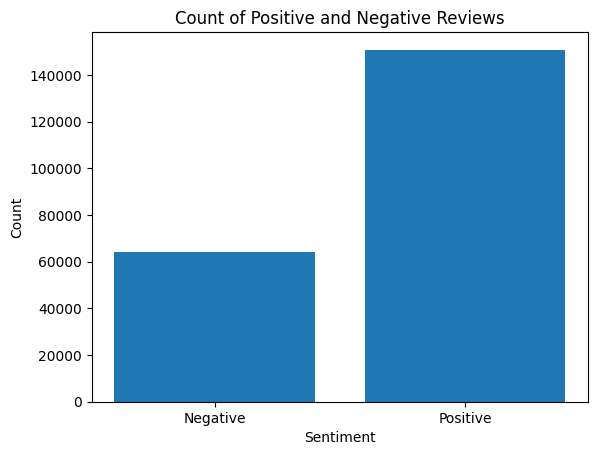

In [70]:

# Calculate the count of positive and negative reviews
sentiment_count = data['sentiment'].value_counts()

# Plot a bar graph to show the count of positive and negative reviews
plt.bar(['Negative', 'Positive'], [sentiment_count[0], sentiment_count[1]])
plt.title('Count of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

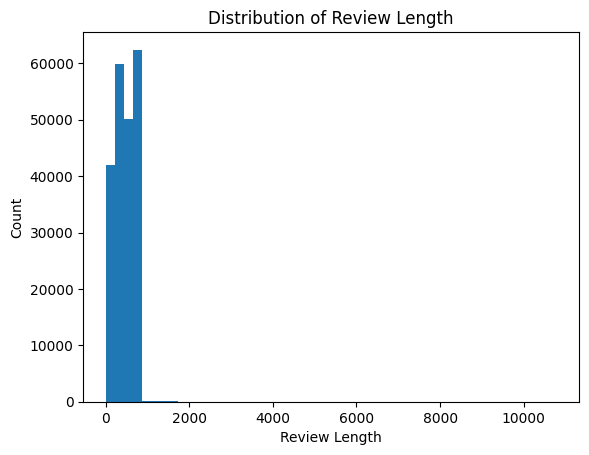

In [71]:
# Calculate the length of each review
review_length = data['review'].apply(len)

# Plot a histogram to show the distribution of review length
plt.hist(review_length, bins=50)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


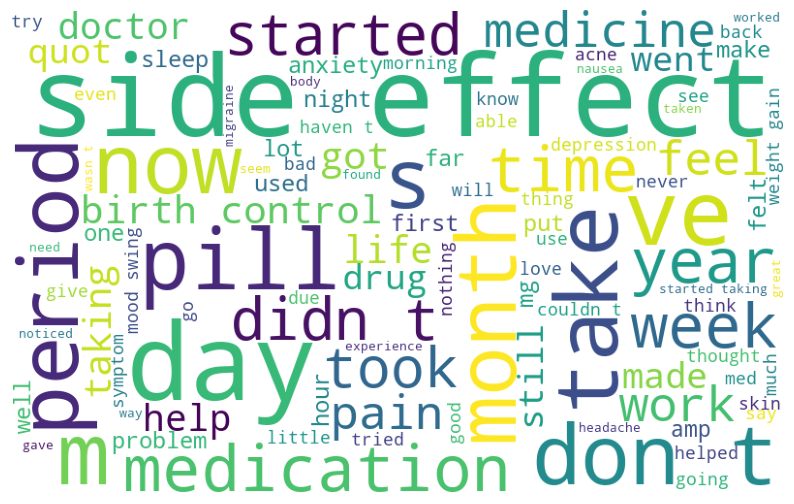

In [72]:


# Join all the reviews into a single string
reviews = ' '.join(data['review'])

# Generate wordcloud using the joined reviews string
wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=100).generate(reviews)

# Plot the wordcloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


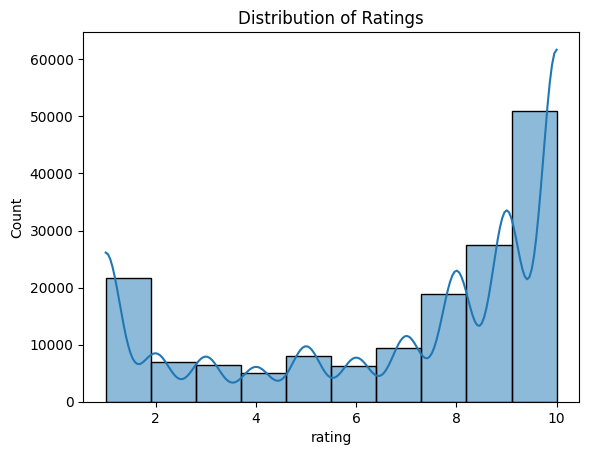

In [73]:
import seaborn as sns

sns.histplot(data_train, x="rating", bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.show()


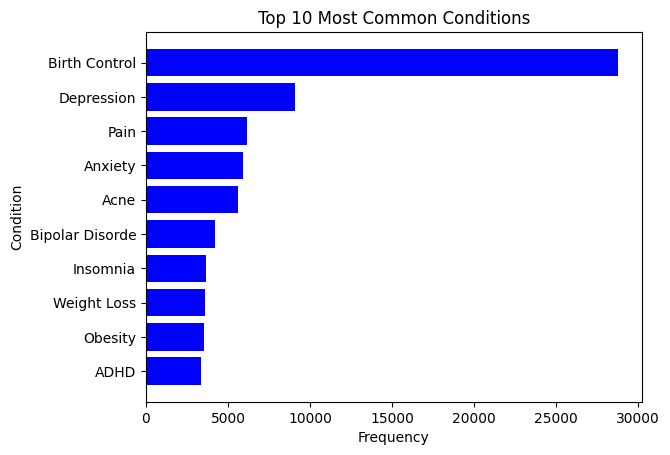

In [74]:
top_conditions = data_train['condition'].value_counts().nlargest(10)
plt.barh(top_conditions.index, top_conditions.values, color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.title('Top 10 Most Common Conditions')
plt.show()


C:\Users\arunp\AppData\Local\Temp\ipykernel_7004\2499375874.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()


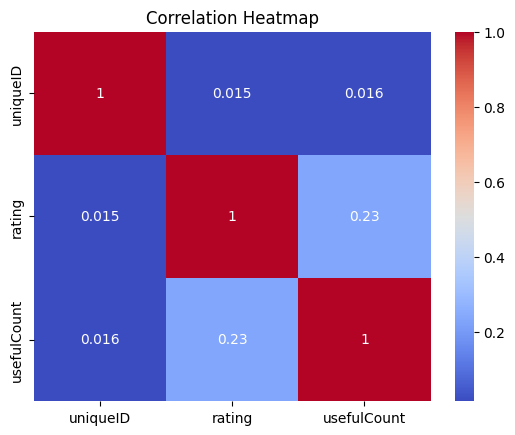

In [75]:

# Plot a heatmap of the correlation between numerical features
corr = data_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\arunp\AppData\Local\Temp\ipykernel_7004\2675944697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='mako')


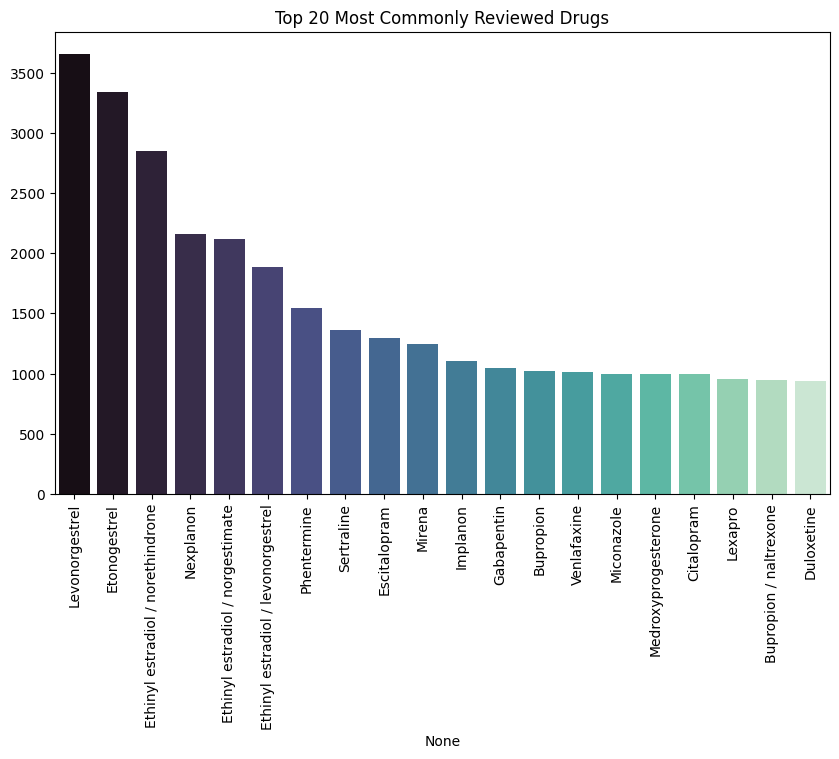

In [76]:
top_drugs = data_train['drugName'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='mako')
plt.title('Top 20 Most Commonly Reviewed Drugs')
plt.xticks(rotation=90)
plt.show()


C:\Users\arunp\AppData\Local\Temp\ipykernel_7004\2399604534.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_train['rating'], shade=True)


<Axes: xlabel='rating', ylabel='Density'>

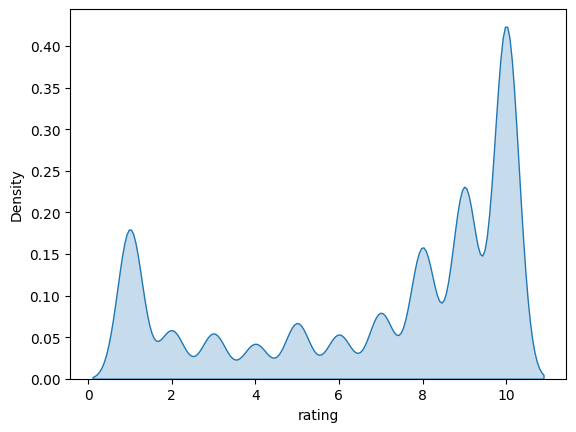

In [77]:
sns.kdeplot(data_train['rating'], shade=True)


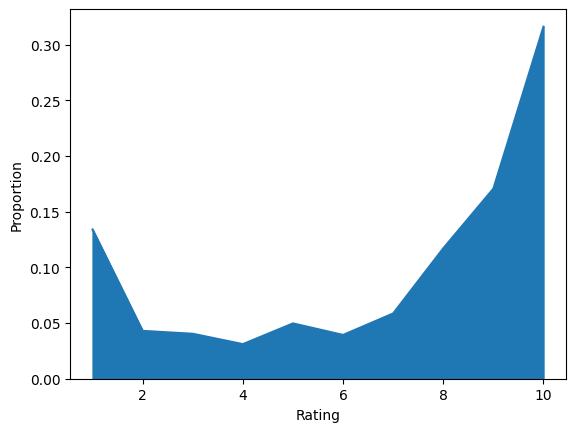

In [78]:
data_train['rating'].value_counts(normalize=True).sort_index().plot.area()
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.show()


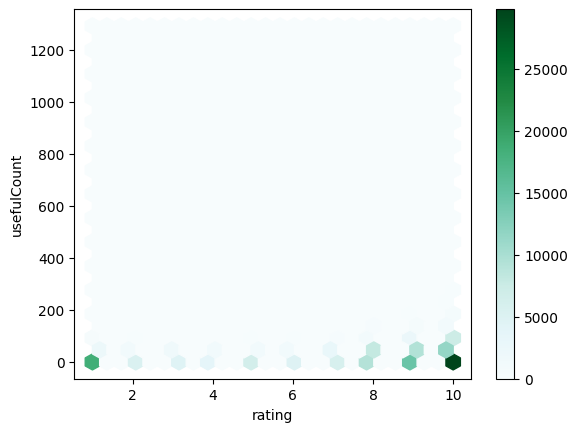

In [79]:
data_train.plot.hexbin(x='rating', y='usefulCount', gridsize=25)
plt.show()


In [80]:
# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluate model performance
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", acc_nb)

Naive Bayes Accuracy: 0.7673064762117323


In [81]:
#Naive-bayes F1 score
y_true1 = y_test
y_pred1 = y_pred_nb
target_names = ['Negative','Positive']
print(classification_report(y_true1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.88      0.26      0.40     16099
    Positive       0.76      0.98      0.86     37667

    accuracy                           0.77     53766
   macro avg       0.82      0.62      0.63     53766
weighted avg       0.79      0.77      0.72     53766



In [82]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# Evaluate model performance
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", acc_log_reg)

# Logistic Regression F1 score
print(classification_report(y_test, y_pred_log_reg, target_names=target_names))

Logistic Regression Accuracy: 0.8392478518022543
              precision    recall  f1-score   support

    Negative       0.78      0.65      0.71     16099
    Positive       0.86      0.92      0.89     37667

    accuracy                           0.84     53766
   macro avg       0.82      0.78      0.80     53766
weighted avg       0.84      0.84      0.83     53766



C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


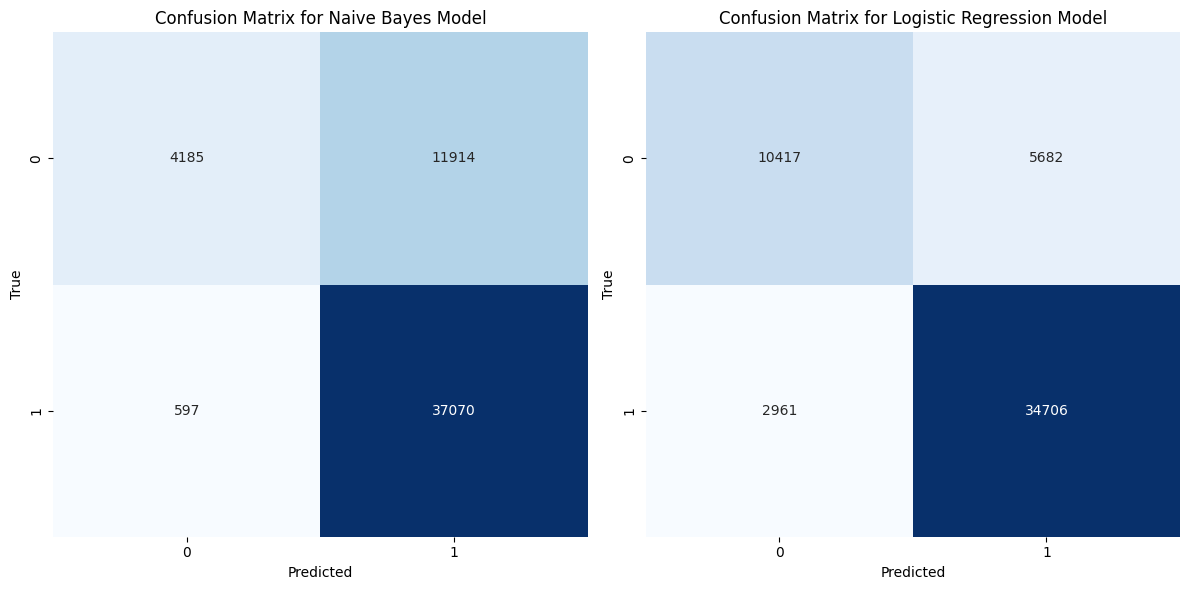

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes Model')

# Plot the confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.subplot(1, 2, 2)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression Model')

plt.tight_layout()
plt.show()


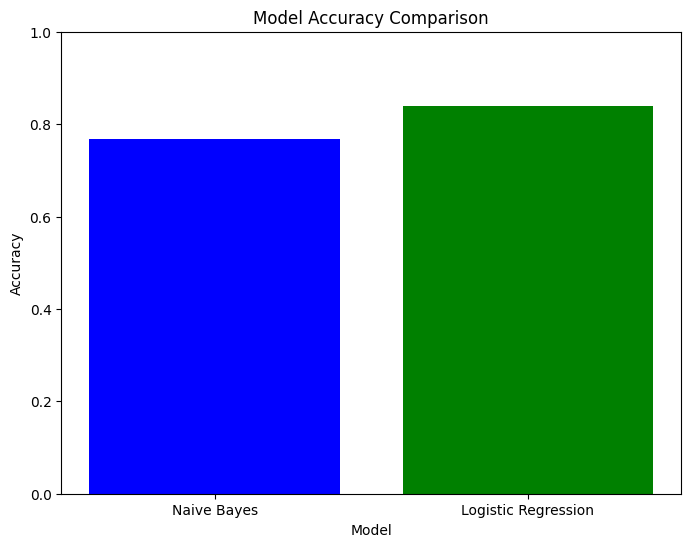

In [84]:
# Calculate accuracies for both models
nb_acc = accuracy_score(y_test, y_pred_nb)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)

# List of accuracies
accuracy = [nb_acc, log_reg_acc]

# Plot accuracy graph
plt.figure(figsize=(8, 6))
plt.bar(['Naive Bayes', 'Logistic Regression'], accuracy, color=['blue', 'green'])
plt.ylim(0.0, 1.0)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


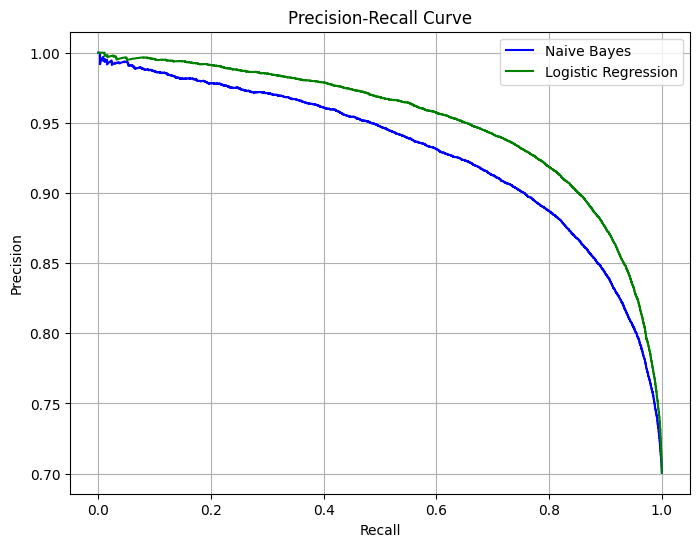

In [85]:
# Compute precision and recall for Naive Bayes
precision_nb, recall_nb, _ = precision_recall_curve(y_test, nb.predict_proba(X_test_tfidf)[:, 1])

# Compute precision and recall for Logistic Regression
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test_tfidf)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, label='Naive Bayes', color='blue')
plt.plot(recall_log_reg, precision_log_reg, label='Logistic Regression', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [86]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
scores_log_reg = cross_val_score(log_reg, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {scores_log_reg.mean()}")

# Cross-validation for Naive Bayes
scores_nb = cross_val_score(nb, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Accuracy: {scores_nb.mean()}")


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression Cross-Validation Accuracy: 0.8372195322702659
Naive Bayes Cross-Validation Accuracy: 0.7593817458958909


In [87]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# import pickle

# # Define the pipeline with Logistic Regression
# pipeline_log_reg = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('log_reg', LogisticRegression(multi_class='ovr'))  # multi_class='ovr' for one-vs-rest
# ])

# # Train the model
# pipeline_log_reg.fit(X_train, y_train)

# # Save the trained model and vectorizer
# with open('models/logistic_regression.pkl', 'wb') as f:
#     pickle.dump(pipeline_log_reg, f)


In [88]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# import pickle

# # Define the pipeline with Naive Bayes
# pipeline_nb = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('nb', MultinomialNB())
# ])

# # Train the model
# pipeline_nb.fit(X_train, y_train)

# # Save the trained model and vectorizer
# with open('models/naive_bayes.pkl', 'wb') as f:
#     pickle.dump(pipeline_nb, f)


In [89]:

# Save Logistic Regression model
with open('models/logistic_regression.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

# Save Naive Bayes model
with open('models/naive_bayes.pkl', 'wb') as f:
    pickle.dump(nb, f)

# Save TfidfVectorizer
with open('models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
